<a href="https://colab.research.google.com/github/RealMyeong/NLP_kaggle_transcription/blob/main/NLP_kaggle_%ED%95%84%EC%82%AC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/naim99/your-first-nlp-competition-submission/notebook

# your first NLP competition submission

# Text classification step by step

Natural Language Processing(NLP) is a subfield of computer science, artificial intelligence, information engineering, and human-computer interaction. This field focuses on how to program computers to precess and analyze large amounts of natural language data. It is difficult to perform as the process of reading and understanding languages is far more complex than it seems at first glance.

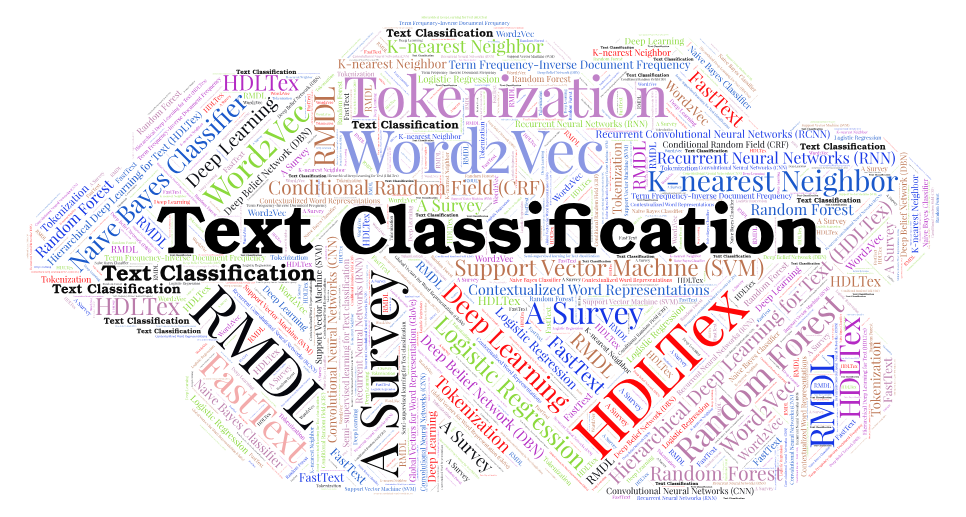

## Objective

Goals of this kernel are the following:
- Basic Exploratory Data Analysis.
- Beginners guide to clean the dataset
- Feature Analysis & extraction
- Modelling and evaluation matrics
- submitting the results

---

## Table of content

### Introduction
- About Data

### Load and Check Data
- Importing Library
- Load Dataset

### Exploratory Data Analysis
- Target variable distribution
- Exploratory analysis of tweets
- Exploratory analysis of Other variables

### Data Preparation
- Data cleaning
- Removing STOP words
- Tokenizing
- Stemming
- Lemmatization
- Splitting the data

### Feature Extraction
- Bag of words
- Tf-idf Vectorizer
- reduce the dimensionality of the Matrix

### Model Training
- MultinomialNB

---
## Introduction

### About Data
- What files do i need?

You'll need train.csv, test.csv and sample_submission.csv

- What should I expect the data format to be?

Each sample in the train and test set has the following information:
1. The text of a tweet
2. A keyword from that tweet (although this may be blank!)
3. The location the tweet was sent from (may also be blank)

- What am I predicting?

You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

- Files
1. train.csv - the training set
2. test.csv - the test set
3. sample_submission.csv - a sample submission file in the correct format

### The columns in this dataset are:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0).

---

## Load and Check Data

### Import Libraries

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import re # regex applies a regular expression to a string and return the matching substrings.
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import Datset

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/Getting_started_with_NLP_A_general_Intro/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/Getting_started_with_NLP_A_general_Intro/test.csv')

In [4]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
print('There are {} rows and {} columns in train'.format(train_data.shape[0], train_data.shape[1]))
print('There are {} rows and {} columns in test'.format(test_data.shape[0], test_data.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


In [6]:
train_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
# Let's display ont the tweets existed in the text column
train_data['text'][11]

'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding'

## Exploratory Data Analysis

### Target variable distribution

Before we begin with anything else, let's check the class distribution. There are only two classes 0 and 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

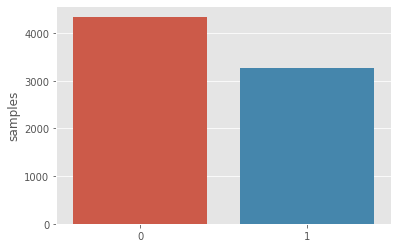

In [8]:
x = train_data.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

There are more tweets with class 0( No disaster ) than class 1 ( disaster tweets )

### Exploratory analysis of tweets

First, we will do very basic analysis, that is character level, word level and sentence level analysis.

Number of characters in tweets

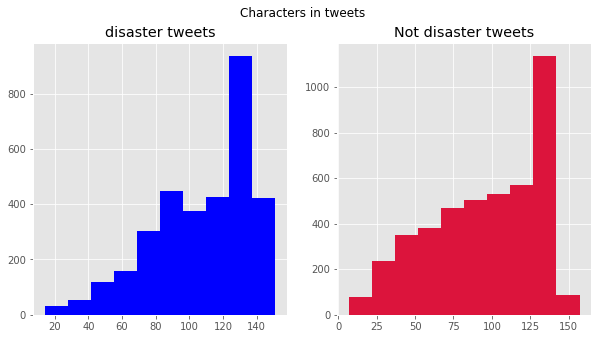

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
tweet_len = train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')
tweet_len = train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len, color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

The distribution of both seems to be almost same. 120 to 140 characters in a tweet are the most common among both.

Number of words in a tweet

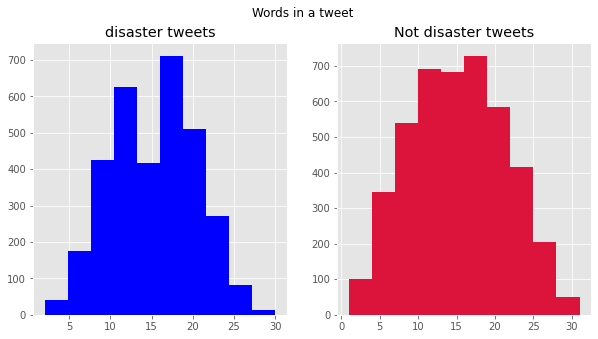

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = train_data[train_data['target']==1]['text'].str.split().map(lambda x : len(x))
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')
tweet_len = train_data[train_data['target']==0]['text'].str.split().map(lambda x : len(x))
ax2.hist(tweet_len, color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Average word length in a tweet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


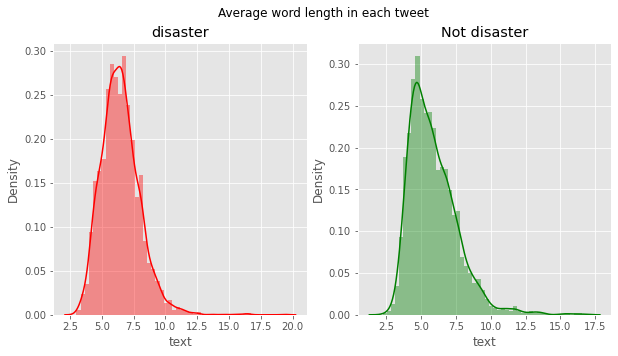

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
word = train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax1, color='red')
ax1.set_title('disaster')
word = train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax2, color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')
plt.show()

Frequencies Now we want to count the frequency of each word in out corpus

In [12]:
corpus = []

for x in train_data['text'].str.split():
  for i in x:
    corpus.append(i)

<BarContainer object of 30 artists>

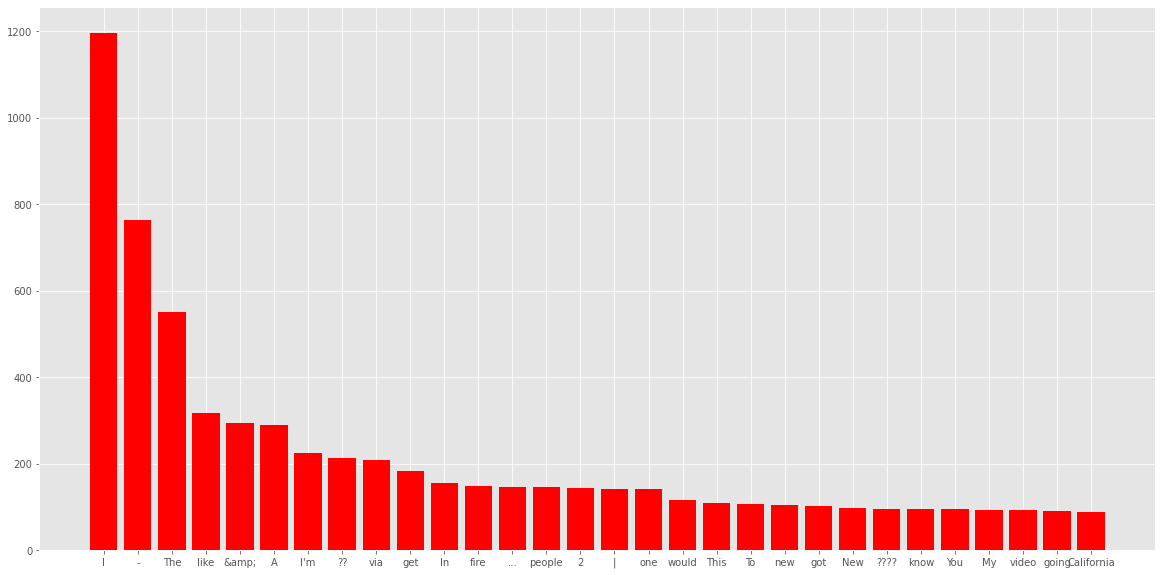

In [13]:
dic = defaultdict(int)
dic = defaultdict(int)
for word in corpus:
  if word not in stop:
    dic[word] += 1
  
top=sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30]

x, y = zip(*top)
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color = 'red')

<BarContainer object of 30 artists>

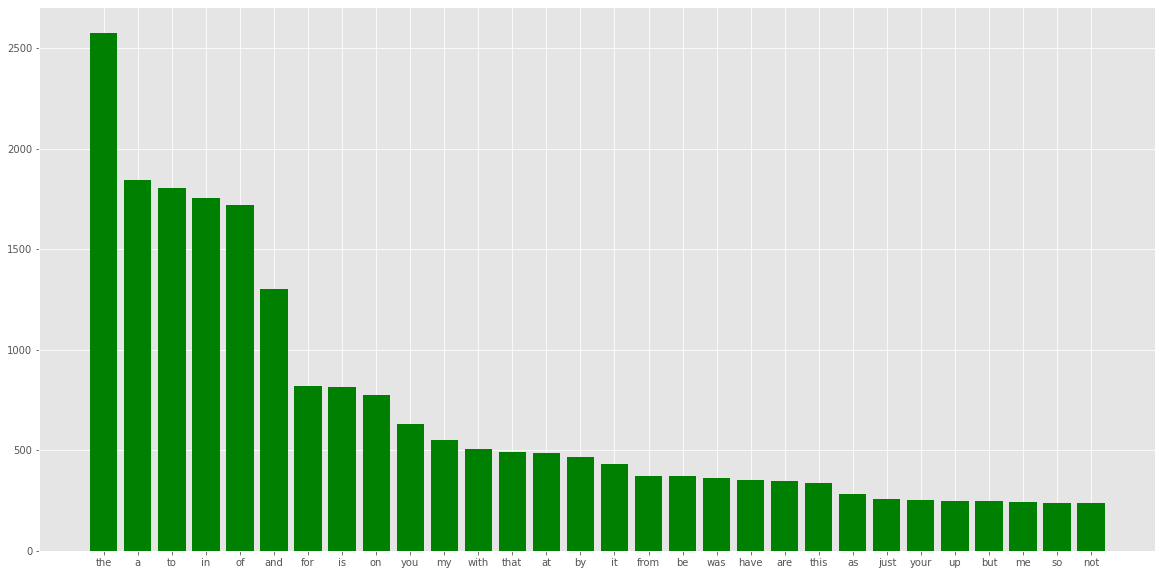

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
dic=defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30]

x, y = zip(*top)
plt.rcParams['figure.figsize'] = (20, 10)
# There is also this wakearound in case you want to change the size without using the figure environment.
# So in case you are using plt.plot() for example, you can set a tuple with width and height

plt.bar(x, y, color='green')

Let's take a look to the punctuations in out tweets:

<BarContainer object of 23 artists>

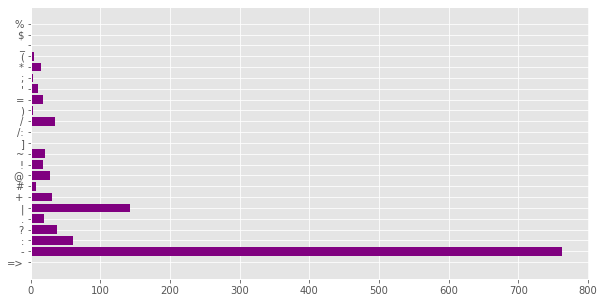

In [15]:
plt.figure(figsize=(10,5))
import string
dic=defaultdict(int)
special = string.punctuation
for i in corpus:
  if i in special:
    dic[i] += 1

x, y = zip(*dic.items())
plt.barh(x, y, color = 'purple')

In details about each target

In [16]:
from collections import Counter

words = train_data[train_data.target==0].text.apply(lambda x : [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
  h_words.update(text_)

print(h_words.most_common(50))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198), ("i'm", 195), ('&amp;', 190), ('??', 183), ('out', 179), ('up', 178), ('will', 177), ('if', 177), ('from', 177), ('all', 173), ('new', 163), ('get', 161), ('as', 160), ('or', 155), ('we', 148), ('when', 144), ('has', 143), ('he', 143), ('no', 140), ('about', 139), ('they', 133)]


In [17]:
words = train_data[train_data.target==1].text.apply(lambda x : [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
  h_words.update(text_)

print(h_words.most_common(50))

[('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344), ('at', 303), ('i', 284), ('by', 274), ('from', 243), ('with', 188), ('that', 181), ('after', 181), ('this', 177), ('as', 167), ('are', 166), ('was', 165), ('it', 163), ('fire', 151), ('have', 140), ('my', 130), ('over', 123), ('you', 121), ('more', 121), ('via', 117), ('up', 114), ('an', 113), ('be', 112), ('...', 106), ('&amp;', 105), ('has', 104), ('suicide', 103), ('who', 100), ('no', 99), ('disaster', 97), ('but', 95), ('police', 94), ('people', 93), ('been', 93), ('when', 93), ('killed', 92), ('like', 91), ('not', 90), ('california', 88), ('than', 85), ('just', 84)]


### Exploratory analysis of Other Variables

keyword and Location

1. Missing values

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set 33% of locations is missing in both training and test set. Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Missing values in those features are filled with no_keyword and no_location respectively

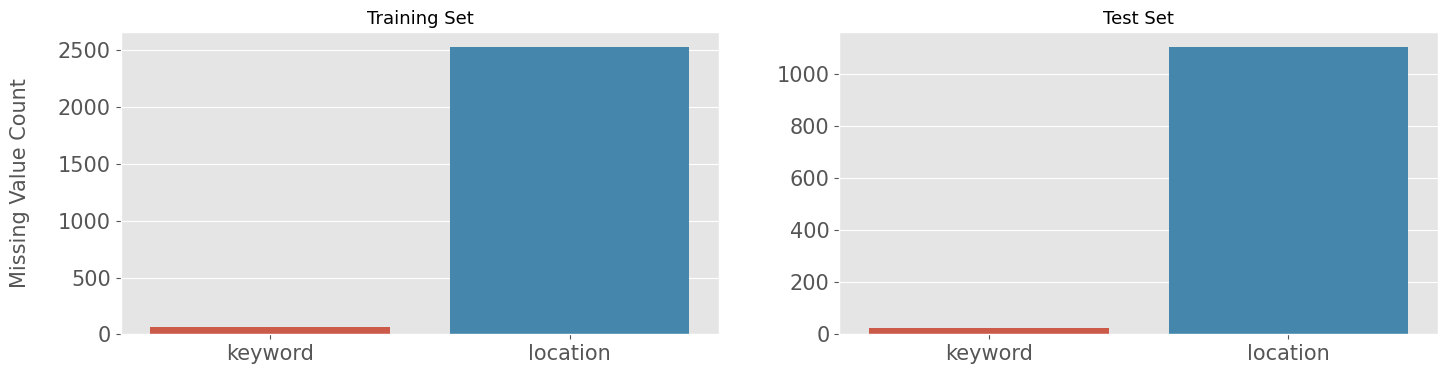

In [18]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols = 2, figsize=(17,4), dpi=100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test_data[missing_cols].isnull().sum().index, y=test_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

1. Cardinality and Target Distribution

Locations are not automatically generated, they are user inputs. That's why location is very dirty and there are too many unique values in it. It shouldn't be used as a feature.

Fortunately, there is signal in keyword because some of those words can only be used in one context. Keywords have very different tweet counts and target means. keyword can be used as a feature by itself or as a word added to the text. Every single keyword in training set exists in test set. If training and test set are from the same sample, it is also possible to use target encoding on keyword.

In [19]:
print(f'Number of unique values in keyword = {train_data["keyword"].nunique()} (Training) - {test_data["keyword"].nunique()} (test)')
print(f'Number of unique values in location = {train_data["location"].nunique()} (Training) - {test_data["location"].nunique()} (Test)')

Number of unique values in keyword = 221 (Training) - 221 (test)
Number of unique values in location = 3341 (Training) - 1602 (Test)


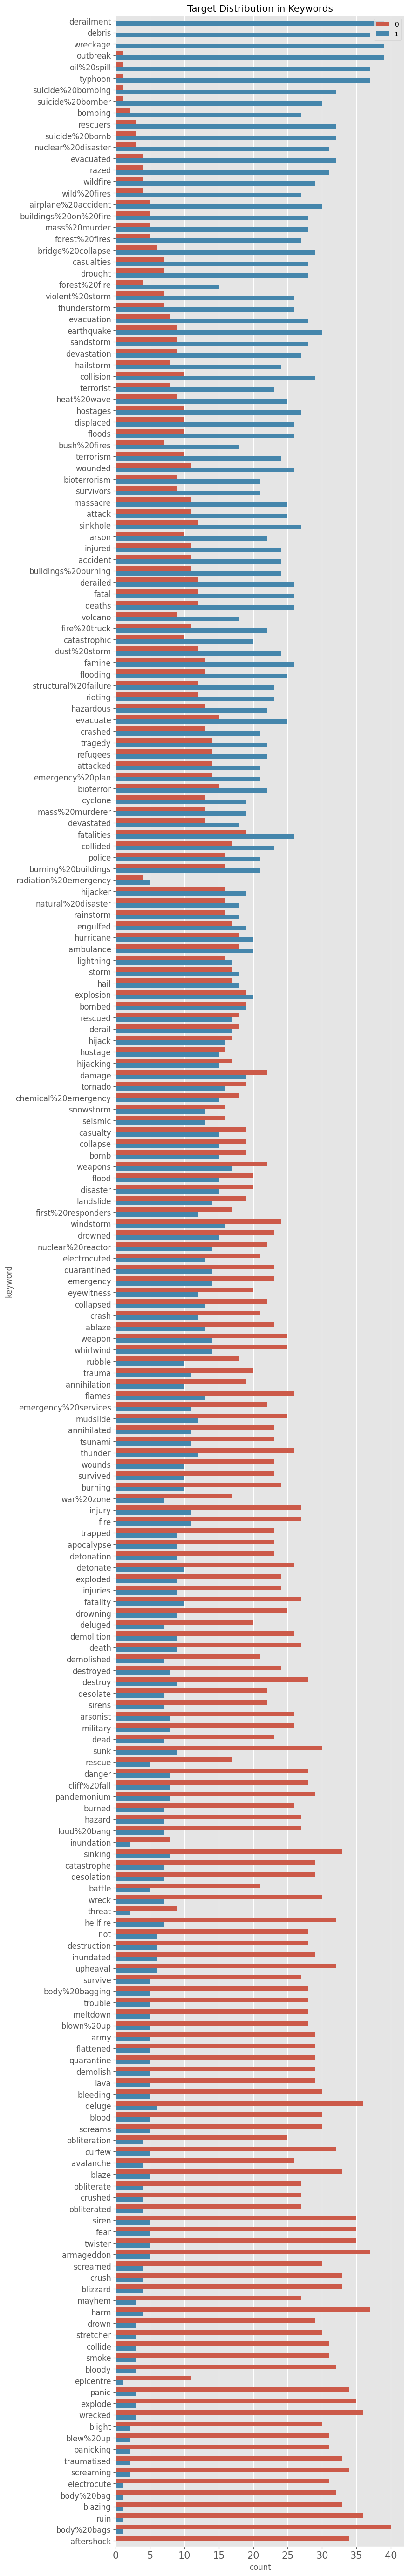

In [20]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig=plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_data.sort_values(by='target_mean', ascending=False)['keyword'],
              hue = train_data.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_data.drop(columns=['target_mean'], inplace=True)

### Hashtag analysis
### Small analysis done on the hashtags, to check it's possible discriminator #capability for this task.

The regular expression

above is meant to find any four digits at the beginning of a string, which suffices for our case. The above is a raw string(meaning that a backslach is no longer an escape character), which is standard practice with regular expressions. regex = r'^(\d{4})'

In [21]:
def clean_text(df, text_field, new_text_field_name):
  df[new_text_field_name] = df[text_field].str.lower() # Convert strings in the Series/Index to lowercase

  # remove numbers
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem : re.sub(r"\d+", "", elem))
  # remove url
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"https?://\S+", "", elem))
  # remove HTML tags
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem : re.sub(r"<.*?>", "", elem))
  # remove emojis
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", elem))
  return df

data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data, 'text', 'text_clean')
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


## Removing Stop words

What are Stop words?

Stop words : A stop word is a commonly used word (such as 'the', 'a', 'an', 'in') that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in out database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address. (Do not forget to change your home directory name)

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


## Tokenizing

Tokenization is the process of tokenizing or splitting a string, text into list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x : word_tokenize(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."


## Stemming

In [24]:
# Stemming
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
text = 'studies studying cries cry'
tokenization = nltk.word_tokenize(text)
for w in tokenization:
  print('Stemming for {} is {}'.format(w, porter_stemmer.stem(w)))

Stemming for studies is studi
Stemming for studying is studi
Stemming for cries is cri
Stemming for cry is cri


In [25]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()
text = 'studies studying cries cry'
tokenization = nltk.word_tokenize(text)
for w in tokenization:
  print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def word_stemmer(text):
  stem_text = [PorterStemmer().stem(i) for i in text]
  return stem_text

data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x : word_stemmer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquak, may, allah, forgi..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, rong, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, place, ', notifi, offic..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, peopl, receiv, #, wildfir, evacu, order, c..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ..."


## Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
  lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
  return lem_text

data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x : word_lemmatizer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resident, asked, 'shelter, place, ', notified..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


Why is Lemmatization better than Stemming? Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word.

On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features. If you look stemming for studies and studying, output is same (studi) but lemmatizer provides different lemma for both tokens study for studies and studying for studying.So when we need to make feature set to train machine, it would be great if lemmatization is preferred.

## Splitting the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['text_clean'], data_clean['target'], test_size=0.2, random_state=10)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6090,)
(6090,)
(1523,)
(1523,)


## Feature Extraction : tf-idf

### Bag of words

Vectorization is the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

#### CountVectorizer
CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document. This implementation produces a sparse representation of the counts.

In [33]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=vectorizer.get_feature_names_out())

,__,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_dangdaddy,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note that for each sentence in the corpus, the position of the tokens (words in out case) is completely ignored. When constructing this bag_of_words representation, the default configuration tokenize the string by extracting words of at least 2 alphanumeric characters (punctuation is completely ignored and always treated as a token seperator)

Consider only certain pattern We can also specify the desired pattern for out token using token_pattern argument. In the following example, we will only consider tokens consists of at least 3 alphabets.

In [34]:
# Only alphabet, contains at least 3 letters
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1,1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, len(X_train)+1)], columns=vectorizer.get_feature_names_out())

,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,zones,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zxathetis,zzzz
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note 1000, be, is, of are removed from the original feature space.

Consider only unigrams/bigrams/... tokens
- ngram-range=(1,1) : unigrams only
- ngram-range=(2,2) : bigrams only
- ngram-range=(1,2) : both unigrams and bigrams

In [36]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(2,2))

# only bigrams
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=vectorizer.get_feature_names_out())

,aaaa lemme,aaaaaaallll even,aaaaaand there,aan den,aannnnd reddit,aashiqui actress,aba woman,abandon plans,abandon west,abandoned aircraft,...,zone war,zones don,zoom one,zotar skeleton,zouma absolutely,zouma flattened,zourryart forgot,zss sws,zumiez location,zxathetis are
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Consider only tokens with certain frequency

We can also make the vectorizer to ignore terms that have a document frequency strictly lower than a specified threshold by setting min_df = threshold or max_df = threshold for higher frequency terms.

In [38]:
# consider both unigrams and bigrams, occur at least twice
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1,2), min_df=2)
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index = ['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=vectorizer.get_feature_names_out())

,aba,aba woman,abandon,abandoned,abandoned aircraft,abbott,abbswinston,abbswinston zionist,abc,abc news,...,zionist terrorist,zippednews,zombie,zombie apocalypse,zone,zone coming,zouma,zouma flattened,zss,zss sws
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


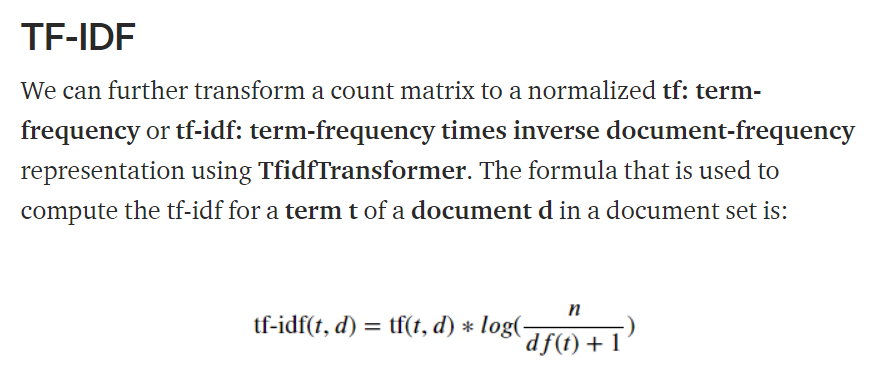

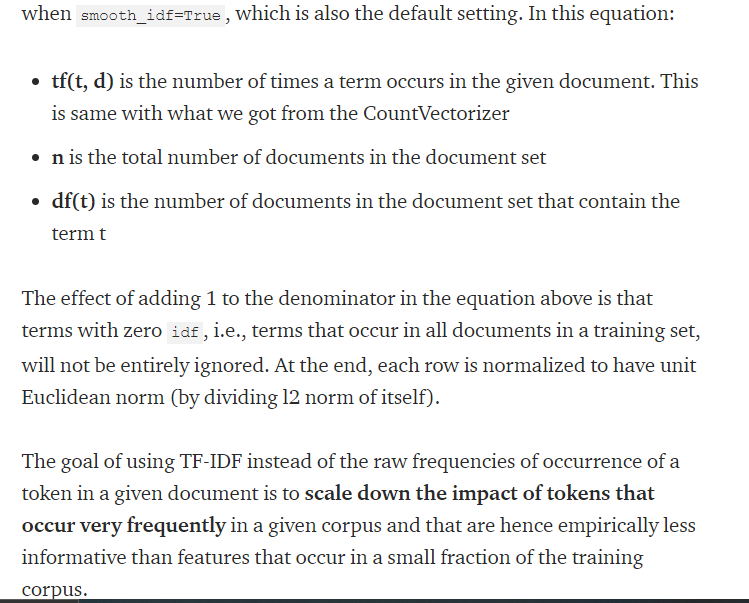

TfidfTransformer v.s. Tfidfvectorizer

Both TfidfTransformer and Tfidfvectorizer modules can convert a collection of raw documents to a matrix of TF-IDF features. However,
1. With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the TF-IDF scores
2. With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computs the word counts, IDF values, and TF-IDF scores all using the same data set.

---

Tfidftransformer

In [41]:
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer, TfidfTransformer)

vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1,1))
count_vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
train_features = tfidf.fit_transform(count_vectorized).toarray()

pd.DataFrame(train_features, index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=vectorizer.get_feature_names_out())

,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,zones,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zxathetis,zzzz
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TfidfVectorizer

In [44]:
# Convert a collection of text documents to a matrix of token counts
tfidf = feature_extraction.text.TfidfVectorizer(encoding='utf-8', ngram_range=(1,1), max_features=5000, norm='l2', sublinear_tf=True)

In [45]:
train_features = tfidf.fit_transform(X_train).toarray()

In [46]:
print(train_features[1])
print(train_features.shape)

[0. 0. 0. ... 0. 0. 0.]
(6090, 5000)


In [47]:
pd.DataFrame(train_features, index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=tfidf.get_feature_names_out())

,__,aa,aba,abandoned,abbswinston,abc,abcnews,abe,ability,ablaze,...,ûï,ûïa,ûïhatchet,ûïrichmond,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
dic_vocabulary = tfidf.vocabulary_

In order to know the position of a certain word, we can look it up in the vocabulary

In [49]:
word = 'forest'
dic_vocabulary[word]
# If the word exists in the vocaulary,
# this command prints a number N,
# meaning that the Nth feature of the matrix is that word.

1352

In [50]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(1523, 5000)


In [51]:
train_labels = y_train
test_labels = y_test

### reduce the matrix dimensionality

in order to reduce the dimensionality of out matrix! [Feature matrix shape : Number of documents x Length of vocabulary ] we can carry out some Feature Selection, the process of selecting a subset of relavant vairables. I will proceed as follows:

treat each category as binary (for example, the 'Tech' category is 1 for the Tech news and 0 for the others); perform a Chi-Square test to determine whether a feature and the (binary) target are independent; keep only the features with a certain p-value from the Chi-Square test

## Model training

### Model : Multinomial NB

In [52]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [54]:
mnb_prediction = mnb_classifier.predict(test_features)

## Visualizing scikit model performance

In [55]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.8691297208538588


In [56]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.7905449770190414


In [57]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       861
           1       0.83      0.65      0.73       662

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



In [58]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[771  90]
 [229 433]]


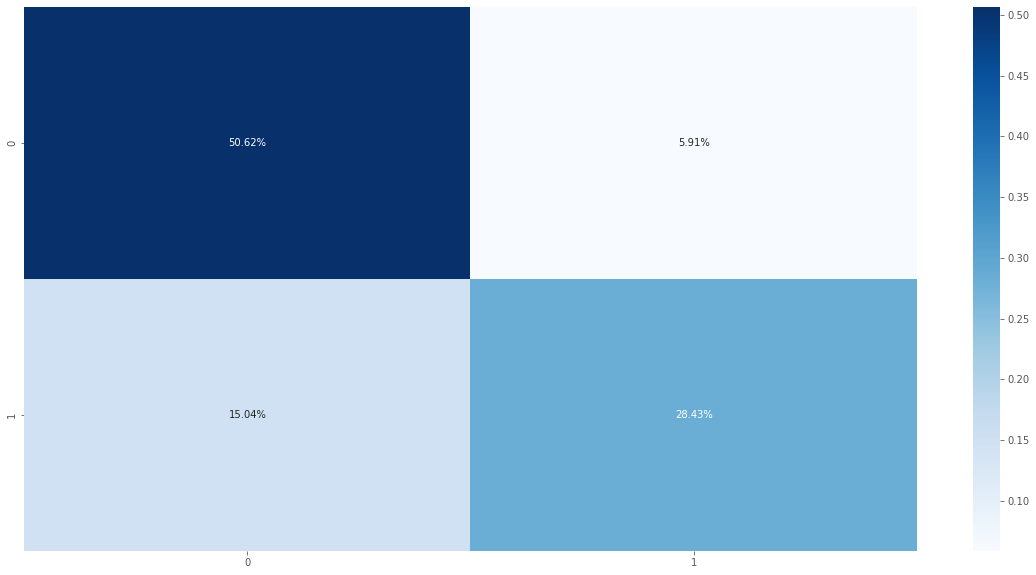

In [60]:
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

## Fitting the Test data for submission

In [61]:
test_vectorizer = tfidf.transform(data_clean_test['text_clean']).toarray()
test_vectorizer.shape

(3263, 5000)

In [62]:
final_predictions = mnb_classifier.predict(test_vectorizer)
final_predictions

array([1, 0, 0, ..., 1, 1, 1])

In [63]:
submission_df = pd.DataFrame()
submission_df['id'] = data_clean_test['id']
submission_df['target'] = final_predictions
submission_df

,id,target
0,0,1
1,2,0
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [64]:
submission_df['target'].value_counts()

0    2284
1     979
Name: target, dtype: int64

In [65]:
# submission = submission_df.to_csv('Result.csv', index=False)